# Linear Regression

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the training data

train = pd.read_csv('LifeExpectancy_training_modified.csv')

In [8]:
# Show the first 5 lines

train.head()

,Year,Status,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Health_Index,Life_expectancy
0,2011,Developing,93,1.57,835.062683,64.0,7.12,81,0.1,8734.96530,4588368.0,0.758,13.2,0.475880,75.0
1,2014,Developing,152,6.41,789.077295,32.4,4.12,99,0.1,5941.84710,68416772.0,0.737,13.6,0.203275,74.6
2,2013,Developed,68,11.82,90.585012,56.6,11.14,95,0.1,554.71532,8479375.0,0.887,15.7,0.913847,81.1
3,2014,Developed,135,0.01,1.576409,59.9,5.57,94,0.1,12.27733,1998979.0,0.797,14.7,0.275401,74.8
4,2002,Developing,192,5.93,27.638103,2.2,3.70,96,0.7,296.54617,6473164.0,0.657,11.5,0.400974,71.4


## Data Exploration
We can plot a histogram of the dataframe for the features except "Status" to understand their distributions. <br/>

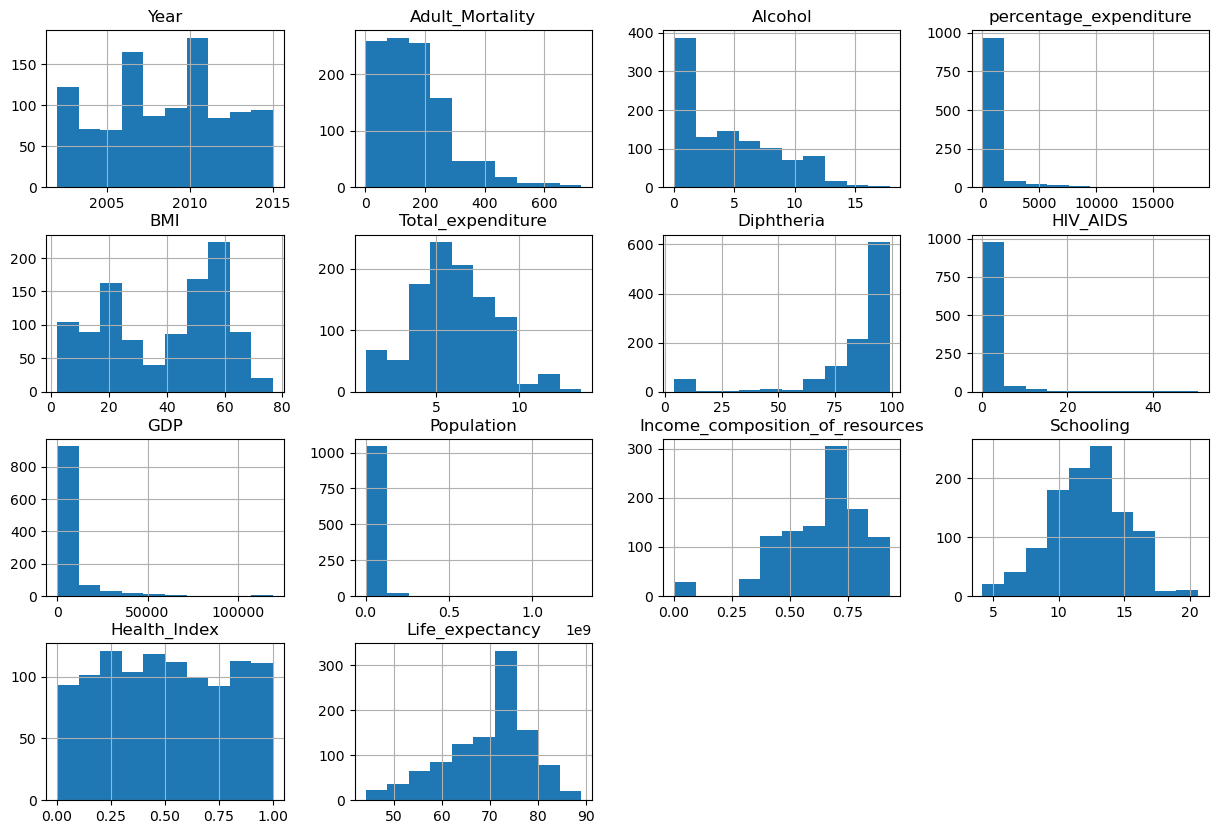

In [7]:
train.hist(figsize=(15,10))
plt.show()

In [ ]:
train['Year'].value_counts().sort_values

<bound method Series.sort_values of 2009    96
2011    93
2014    92
2013    92
2010    89
2008    87
2012    85
2007    83
2006    82
2004    71
2005    70
2002    61
2003    61
2015     2
Name: Year, dtype: int64>

### Inference from the histograms <br/>

**Year**: Given that year is a discrete variable, it would be more appropriate to plot its distribution using a bar graph as opposed to a histogram.

**Adult Mortality**: It is skewed to the right implying that majority of the adult mortality rates are not more than 400 per 1000 population.

**Alcohol**: It is skewed to the right implying that alcohol consumption per capita is less than 5 for majority of the population.

**Percentage Expenditure**: It is extremely skewed to the right suggesting that the Expenditure on health as a percentage of Gross Domestic Product per capita is not more than 3000-4000.

**BMI**: The average Body Mass Index of entire population seems to be bimodal and spike around 20 and 55 respectively suggesting that either many people are very healthy or very unhealthy.

**Total_expenditure**: The general expenditure by the government on health seems to be approximately normally distributed.

**Diphtheria**: It is highly skewed to the left implying that the diphtheria immunization coverage is greater than 75% for majority of the population.

**HIV_AIDS**: It is highly skewed to the right implying that the number of deaths per 1000 live births (HIV/AIDS) is less than 5.

**GDP**: It is extremely skewed to the right suggesting that the GDP is very low.

**Population**: The distribution is skewed to the right. Most values seem to be centered around 0.1-0.2 * 10^9.

**Income Composition of Resources**: It is skewed to the left implying a higher Human Development Index.

**Schooling**: It tends to be approximately normally distributed with an average number of schooling years between 10-15 years.

**Health_Index**: This is multimodal and nothing concrete can be inferred from it.

**Life Expectancy**: It is slightly skewed to the left with a mode of 72-74.



Compute the correlation matrix to get an understanding of the correlation between life_expectancy and the other features.<br/>

In [ ]:

train.corr()["Life_expectancy"]

<ipython-input-16-809b4d69563b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()["Life_expectancy"]


Year                               0.070097
Adult_Mortality                   -0.698473
Alcohol                            0.439279
percentage_expenditure             0.412576
BMI                                0.557677
Total_expenditure                  0.211976
Diphtheria                         0.366748
HIV_AIDS                          -0.588284
GDP                                0.445212
Population                        -0.009788
Income_composition_of_resources    0.756515
Schooling                          0.755132
Health_Index                       0.048112
Life_expectancy                    1.000000
Name: Life_expectancy, dtype: float64

<ipython-input-13-d57083740da1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


<Axes: >

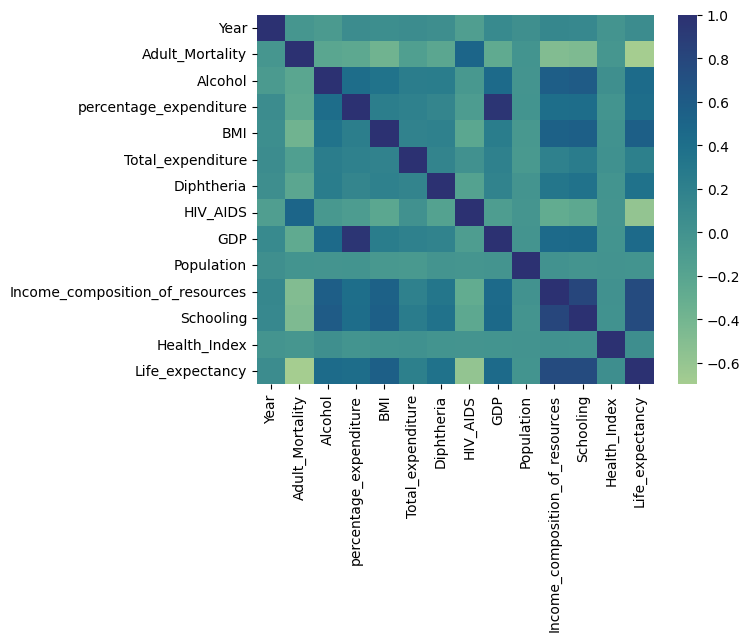

In [ ]:
sns.heatmap(train.corr(), cmap = 'crest')

### Standardization of features

Feature standardization makes the values of each feature in the data have zero-mean and unit-variance. This method is widely used for normalization in many machine learning algorithms. The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values of each feature by its standard deviation.

$x'$ = ($x$ - $\bar{x}$)/$\sigma$

where $x$ is the original feature vector,
$\bar{x}$ is the mean of the feature vector and
$\sigma$ is its standard deviation.

This is also called Z-score Normalization.

Performing Z-score Normalization on the features (except "Year" and "Status") in both training and test set.

In [ ]:
# Load the test set 
test = pd.read_csv("LifeExpectancy_test_modified.csv")

train.columns
test.columns

Index(['Year', 'Status', 'Adult_Mortality', 'Alcohol',
       'percentage_expenditure', 'BMI', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Population', 'Income_composition_of_resources',
       'Health_Index', 'Schooling'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
numeric_columns = train.drop(["Life_expectancy", "Year", "Status"],axis='columns').columns
scaler = StandardScaler().fit(test[numeric_columns])
train[numeric_columns] = scaler.transform(train[numeric_columns])
test[numeric_columns] = scaler.transform(test[numeric_columns])

### One-Hot Encoding

"Year" and "Status" can only take discrete values. We need to perform one-hot encoding on discrete values for it to be processed in the model. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.
Performing one-hot encoding on "Year" and "Status" and print the shape of your encoded array

In [ ]:
from sklearn.preprocessing import OneHotEncoder
### WRITE CODE TO PERFORM ONE-HOT CODING ON "Year" AND "Status" ###
cat_cols = ["Year", "Status"]
encoder = OneHotEncoder(sparse_output=False, handle_unknown="infrequent_if_exist").fit(train[cat_cols])
enc_column_names = [f"{col}_{enc}" for col, encs in zip(cat_cols, encoder.categories_) for enc in encs]
train_cat = pd.DataFrame(encoder.transform(train[cat_cols]), columns=enc_column_names)
test_cat = pd.DataFrame(encoder.transform(test[cat_cols]), columns=enc_column_names)
# Print the shape of your encoded X
train_cat.shape

(1064, 16)

## Multiple Linear Regression

In the big data era, it is highly unlikely that we are interested in the effect of a single variable on another. To simultaneously account for the effects of multiple variables, we use multiple regression (which accounts for the covariances between predictors).

While the algorithmic solution to multiple regression exists, it is easier to conceptualize in terms of linear algebra. The optimal $\hat{\beta}$ vector that minimizes the residual sum of squares is:

$\hat{\beta} = (X^TX)^{-1}X^Ty $


Performing multiple linear regression on the training dataset, where the outcome is "Life_expectancy".

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
### Building and fitting the Multiple Linear Regression model###
y_train = train["Life_expectancy"]
X_train = pd.concat([train.drop(cat_cols+["Life_expectancy"], axis='columns'), train_cat],axis='columns')
X_test = pd.concat([test.drop(cat_cols, axis='columns'), test_cat],axis='columns')
model = LinearRegression().fit(X_train, y_train)

In [ ]:
### Evaluating the Linear Regression model by computing MSE on the training set###
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, model.predict(X_train))

12.747314971108777

Printing the value of coefficients and also the corresponding variable names for the coefficients.

In [ ]:
pd.DataFrame([model.coef_], columns=X_train.columns, index=['column_name']).T

,column_name
Adult_Mortality,-2.170051
Alcohol,-0.497004
percentage_expenditure,0.538908
BMI,0.686499
Total_expenditure,0.246532
Diphtheria,0.550292
HIV_AIDS,-3.171361
GDP,0.129958
Population,-0.084631
Income_composition_of_resources,2.102447


<ipython-input-37-1df3d0bfd6af>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr())


<Axes: >

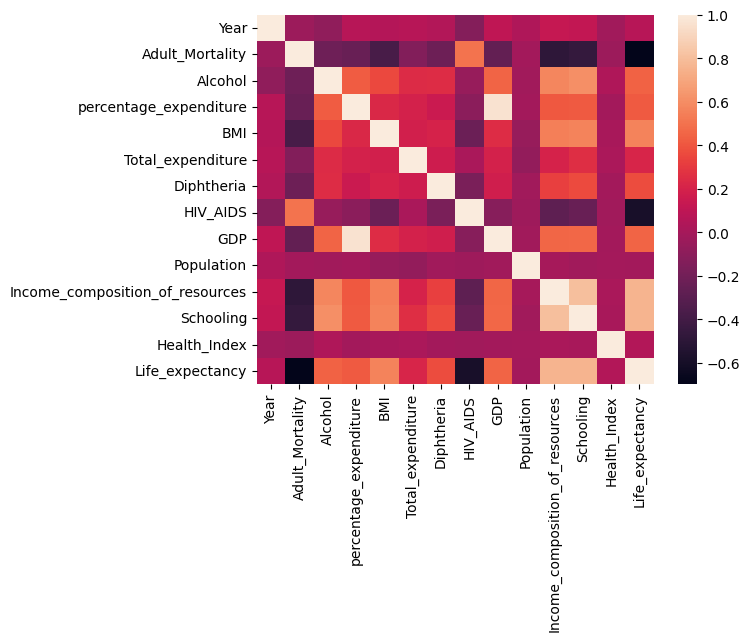

In [ ]:
sns.heatmap(train.corr())

The variables with high correlation, such as GDP and percentage_expenditure, capture similar factors. Including both of these variables in the analysis would lead to an overestimation of their importance, introducing redundancy in the assessment. There also appears to be a relatively high correlation between schooling and income_composition_of_resources. Both of these cases suffer from the problem of multicollinearity. Several things we could do include drop features or adopt dimension reduction on highly correlated variables. We can also implement techniques like LASSO regularization that will shrink coefficient values and penalize variables involved in multicollinearity. Some variables may disappear completely if we use LASSO, which adequately tackles the problem of multicollinearity.

### Goodness of fit
calculating R2 score

In [ ]:
from sklearn.metrics import r2_score

$R^2$ for model with "Schooling" as predictor and "Life_expectancy" as outcome

In [ ]:


# Print R2 score
r2_score(y_train, LinearRegression().fit(X_train[["Schooling"]], y_train).predict(X_train[["Schooling"]]))

0.5702238510104201

$R^2$ for model with "Schooling", "Adult_Mortality" as predictor and "Life_expectancy" as outcome

In [ ]:


# Print R2 score
r2_score(y_train, LinearRegression().fit(X_train[["Schooling", "Adult_Mortality"]], y_train).predict(X_train[["Schooling", "Adult_Mortality"]]))

0.7248288890984036

$R^2$ for model with "Schooling","Adult_Mortality" and "Population" as predictor and "Life_expectancy" as outcome

In [ ]:

# Print R2 score

r2_score(y_train, LinearRegression().fit(X_train[["Schooling", "Adult_Mortality", "Population"]], y_train).predict(X_train[["Schooling", "Adult_Mortality", "Population"]]))

0.7248514023230492

We can see $R^2$ is always going up as we keep adding features.

This is one drawback of only using $R^2$ to evaluate your model. Adding predictors seems to always improve the predictive ability of your model, though it may not be true.

That is to say, we are not necessarily interested in making a perfect prediciton of our training data. If we were, we would always use all of the predictors available. Rather, we would like to make a perfect prediction of our test data. In this case, adding all the predictors may not be a good idea due to the trade-off between bias and variance. Thus, we are interested in the most predictive features, in the hopes that we can create a simpler model that performs well in the future.

This is why we consider another metric, Adjusted R2.
The adjusted R-squared increases only if the new term improves the model more than would be expected by chance.


$AdjustedR^2$ = $1 - \dfrac{(1-R^2)(n-1)}{(n-p-1)}$<br/>
where:<br/>
n = number of samples<br/>
p = number of features



Adjusted $R^2$ for model with "Schooling" as predictor and "Life_expectancy" as outcome

In [ ]:
#defining a function for adjuster r^2
def adj_r2(r2:float, n:int, p:int) -> float:
    return 1 - (1-r2)*(n-1) / (n-p-1)

# Print Adjusted R2 score
adj_r2(
    r2=r2_score(y_train, LinearRegression().fit(X_train[["Schooling"]], y_train).predict(X_train[["Schooling"]])),
    n=X_train.shape[0],
    p=1
)

0.5698191653710702

Adjusted $R^2$ for model with "Schooling", "Adult_Mortality" as predictor and "Life_expectancy" as outcome.

In [ ]:


# Print Adjusted R2 score
adj_r2(
    r2=r2_score(y_train, LinearRegression().fit(X_train[["Schooling", "Adult_Mortality"]], y_train).predict(X_train[["Schooling", "Adult_Mortality"]])),
    n=X_train.shape[0],
    p=2
)

0.7243101876640934

Adjusted $R^2$ for model with "Schooling","Adult_Mortality" and "Population" as predictor and "Life_expectancy" as outcome

In [ ]:


# Print Adjusted R2 score
adj_r2(
    r2=r2_score(y_train, LinearRegression().fit(X_train[["Schooling", "Adult_Mortality", "Population"]], y_train).predict(X_train[["Schooling", "Adult_Mortality", "Population"]])),
    n=X_train.shape[0],
    p=2
)

0.7243327433264857

### K-fold Cross-Validation

However, adjusted $R^2$ is not enough to help us ahieve the best model, a more robust method is k-fold cross-validation.

* Randomly split dataset into K equal-sized subsets, or folds
* Treat each fold as validation set (train on all but K'th fold and test on K'th fold only)

* The overall error is then the mean error over all K models.
* Most common are 5- or 10-fold cross-validation

Implementing a 5-fold cross-validation by yourselves to find the best model in terms of Mean Square Error(MSE)



In [ ]:
# Designing a function to implement 5-fold cross-validation.
# The input: training features X, training target y and # of folds f=5.
# The output: the average of MSE over the 5 folds.

def cross_val_mse(X, y, f):
    ### Write your code here ###

    total = pd.concat([X, y],axis='columns')
    col_names = total.columns.values
    total = total.sample(frac=1).reset_index(drop=True)

    fold_size = len(total) // f
    remainder = len(total) % f

    mses = []
    start = 0
    for i in range(f):
        end = start + fold_size + (1 if i < remainder else 0)
        test_indices = range(start, end)
        train_indices = list(set(range(len(total))) - set(test_indices))
        start = end
        X_val = total[total.index.isin(test_indices)][col_names[:-1]]
        X_train = total[total.index.isin(train_indices)][col_names[:-1]]
        y_val = total[total.index.isin(test_indices)][col_names[-1]]
        y_train = total[total.index.isin(train_indices)][col_names[-1]]
        model = LinearRegression().fit(X_train, y_train)
        mses.append(mean_squared_error(y_val, model.predict(X_val)))
    return sum(mses) / f
cross_val_mse(X_train, y_train, 5)

13.528495512157269

In [ ]:
# Finding the best combination of features, which has the lowest averaged MSE
from itertools import combinations

best_avg_mse = float('inf')
best_feat = []

cat_cols = ["Status"]
encoder = OneHotEncoder(sparse_output=False, handle_unknown="infrequent_if_exist").fit(train[cat_cols])
enc_column_names = [f"{col}_{enc}" for col, encs in zip(cat_cols, encoder.categories_) for enc in encs]
train_cat = pd.DataFrame(encoder.transform(train[cat_cols]), columns=enc_column_names)
test_cat = pd.DataFrame(encoder.transform(test[cat_cols]), columns=enc_column_names)
y_train = train["Life_expectancy"]
X_train = pd.concat([train.drop(cat_cols+["Life_expectancy"], axis='columns'), train_cat],axis='columns')
X_test = pd.concat([test.drop(cat_cols, axis='columns'), test_cat],axis='columns')

acc_dict = {k:{"feats":None, "mse":0} for k in range(5, 11)}
for num_feat_to_keep in range(5, 11):
  selected_features = set(X_train.columns.values)
  while len(selected_features) > num_feat_to_keep:  # Stop when only one feature is left
      accuracies = []

      for feature in selected_features:
          # Exclude one feature at a time
          subset_features = [f for f in selected_features if f != feature]
          feat_avg_mse = cross_val_mse(X_train[subset_features], y_train, 5)
          accuracies.append((feature, feat_avg_mse))

      # Identify the least important feature
      accuracies.sort(key=lambda x: x[1])
      least_important_feature = accuracies[0][0]

      # Remove the least important feature
      selected_features.remove(least_important_feature)
  acc_dict[num_feat_to_keep]["feats"] = selected_features
  acc_dict[num_feat_to_keep]["mse"] = cross_val_mse(X_train[selected_features], y_train, 5)

<ipython-input-84-78cd0aa7848e>:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  acc_dict[num_feat_to_keep]["mse"] = cross_val_mse(X_train[selected_features], y_train, 5)
<ipython-input-84-78cd0aa7848e>:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  acc_dict[num_feat_to_keep]["mse"] = cross_val_mse(X_train[selected_features], y_train, 5)
<ipython-input-84-78cd0aa7848e>:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  acc_dict[num_feat_to_keep]["mse"] = cross_val_mse(X_train[selected_features], y_train, 5)
<ipython-input-84-78cd0aa7848e>:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  acc_dict[num_feat_to_keep]["mse"] = cross_val_mse(X_train[selected_features], y_train, 5)
<ipython-input-84-78cd0aa7848e>:37: 

In [ ]:
selected_features = []
cur_min_mse = float('inf')
for num_feat in acc_dict:
  if acc_dict[num_feat]["mse"] < cur_min_mse:
    cur_min_mse = acc_dict[num_feat]["mse"]
    selected_features = acc_dict[num_feat]['feats']

In [ ]:
# Print the best features and the corresponding mse

print(selected_features)
print(cross_val_mse(X_train[selected_features], y_train, 5))

{'Total_expenditure', 'Adult_Mortality', 'HIV_AIDS', 'Schooling', 'BMI', 'GDP', 'Year', 'Diphtheria', 'Income_composition_of_resources'}
13.49794188544766


<ipython-input-87-1bd82850ddcb>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  print(cross_val_mse(X_train[selected_features], y_train, 5))


### Test the model
Applying the best model to predict the target values from the test feature set "LifeExpectancy_test_modified.csv".

In [ ]:

model = LinearRegression().fit(X_train[list(selected_features)], y_train)

In [ ]:
# Output your prediction on test set as y_pred.
y_pred = model.predict(X_test[list(selected_features)])

In [ ]:
#end